In [256]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

%matplotlib inline

In [257]:
# read dataset
wine_df = pd.read_csv(".\datasets\wine.csv")
wine_df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez


In [258]:
# dataset information
print('There are {} wine records and {} features/columns in this dataset. \n'.format(wine_df.shape[0], wine_df.shape[1]))
print('A total of {} countries who produce wine are included in this dataset, such as {} etc.. \n'.format(len(wine_df.country.unique()), ','.join(wine_df.country.unique()[0:4])))
print('There are {} types of wine were listed, such as {}, etc..\n'.format(len(wine_df.variety.unique()), ','.join(wine_df.variety.unique()[0:4])))

wine_df.columns

There are 1103 wine records and 11 features/columns in this dataset. 

A total of 22 countries who produce wine are included in this dataset, such as US,Spain,France,Italy etc.. 

There are 124 types of wine were listed, such as Cabernet Sauvignon,Tinta de Toro,Sauvignon Blanc,Pinot Noir, etc..



Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

_Here are some explanation of variables appeared in this dataset:_

-	country: The country that the wine is from
-	description: A few sentences from a sommelier describing the wine’s taste, smell, look, feel, etc.
-	designation: The vineyard within the winery where the grapes that made the wine are from
-	points: The number of points WineEnthusiast rated the wine on a scale of 1–100 (though they say they only post reviews for wines that score >=80)
-	price: The cost for a bottle of the wine
-	province: The province or state that the wine is from
-	region_1: The wine growing area in a province or state (ie Napa)
-	region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
-	variety: The type of grapes used to make the wine (ie Pinot Noir)
-	winery: The winery that made the wine


## Data preparation
- identify/remove columns that are duplicate or unneessary
- identify null values and prepare these missing data 

In [259]:
# we will not use columns 'Unnamed: 0', 'designation', 'region_1', and 'region_2' in this analysis
# they will be removed from the dataset
# drop columns 'designation', 'region_1' and 'region_2'
wine_df = wine_df.drop(['Unnamed: 0', 'designation', 'region_1', 'region_2'], axis = 1)
wine_df.head(2)

,country,description,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez


In [260]:
# remove duplicate rows if any
wine_df = wine_df.drop_duplicates()

In [261]:
# check data information and see if there is any null value in the dataset

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1102
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      1061 non-null   object 
 1   description  1061 non-null   object 
 2   points       1061 non-null   int64  
 3   price        1007 non-null   float64
 4   province     1061 non-null   object 
 5   variety      1061 non-null   object 
 6   winery       1061 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 66.3+ KB


Text(0.5, 1.0, 'Overview of missing data')

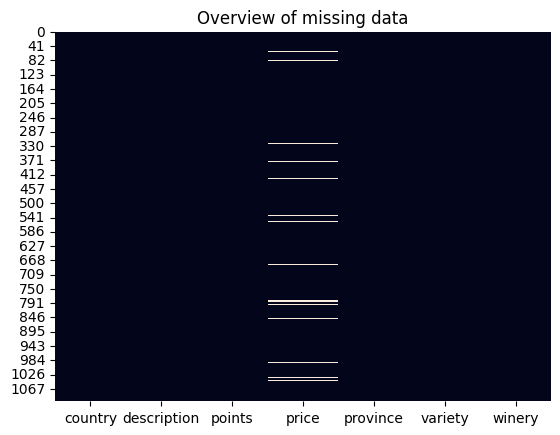

In [262]:
# use seaborn to visualise missing values
sns.heatmap(wine_df.isnull(), cbar=False)
plt.title('Overview of missing data')

_From above results, it seems that only small proportion of ‘price’ values are missed. These were filled in with average value of the 'price' column._

In [263]:
# fill the missing value for 'price' with mean
# wine_df['price'] = pd.to_numeric(wine_df['price'])
wine_df['price'].fillna(wine_df['price'].mean(), inplace=True)

# double check dataset information after data preparation
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1102
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      1061 non-null   object 
 1   description  1061 non-null   object 
 2   points       1061 non-null   int64  
 3   price        1061 non-null   float64
 4   province     1061 non-null   object 
 5   variety      1061 non-null   object 
 6   winery       1061 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 66.3+ KB


## Data visualisation

#### 1. Find out which nations are top wine making nations in the world.

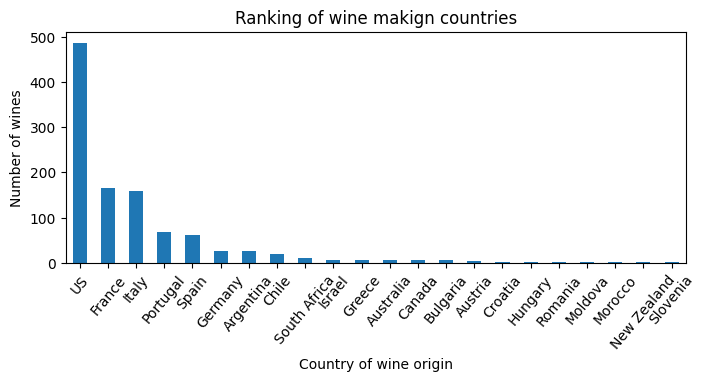

In [264]:
# use 'country' column to find out ranking of wines produced by each country
# plot the graph using number of wines produced by each country
country = wine_df.groupby('country')
plt.figure(figsize=(8,3))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title('Ranking of wine makign countries')
plt.xlabel("Country of wine origin")
plt.ylabel("Number of wines")
plt.show()


_From above results, it is apparent that US the top one and has nearly 500 types of wine in the wine review dataset. This is over 2 times higher than the next one in the rank: France, thought France has always been known as famous for its wine. Itally has slightly less number of wines than France and is being ranked the 3rd._

### 2. Which country has top quality wines from the dataset

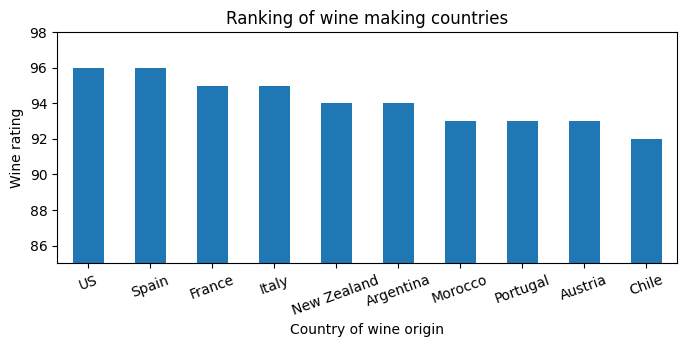

In [265]:
# points rating feature was used to rank highest quality of wines produced by each country.
# bar plot was created to demonstrate results
plt.figure(figsize = (8, 3))
country.max().sort_values(by='points', ascending=False)['points'].head(10).plot.bar()
plt.xticks(rotation=20)
plt.ylim(85, 98)
plt.title('Ranking of wine making countries')
plt.xlabel("Country of wine origin")
plt.ylabel("Wine rating")
plt.show()

_From results above, all top 10 countries have rating(‘points’) ≥ 92. Among those, both US and Spain have equal rating of 96 and are rated the 1st. France and Italy has wine rating of 95 and are being ranked the 2nd._

### 3.	What is the distribution of wine rating look like for entire dataset? This will also help interpret how good quality the wine is for the top 10 rated countries.

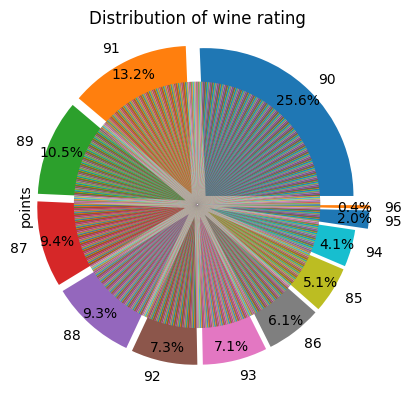

In [266]:
plt.figure(figsize = (4, 4))
explode = (.1, .1, .1, .1, .1, .1, .1, .1, .1, .1, .2, .2)
wine_df['points'].value_counts().plot(kind='pie', pctdistance=0.9, autopct='%.1f%%', radius = 1.2, explode = explode)
plt.pie(wine_df['points'] )
#wine_points = wine_df['points'].value_counts()
plt.title('Distribution of wine rating', pad=20)
plt.show()

_From results above, about 25.6% of wines in the dataset are ranked at 90 and this is the largest proportion for all the rating. Over 50% of wines are ranked under 90. Only 0.4% are ranked 96 and 2.0% ranked 95. Therefore, the top 10 ranking wine countries in the dateset can produce very good quality wines._

### 4. Please check whether wine ranking is related with price and determine whether you should spend lots of money to buy high quality wines.

C:\Users\Feifei\AppData\Local\Temp\ipykernel_13336\1057461244.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine_df.corr(), annot=True)


<AxesSubplot: >

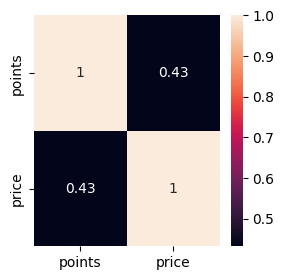

In [267]:
# use a heatmap to compare correlation between price and points
plt.figure(figsize=(3, 3))
sns.heatmap(wine_df.corr(), annot=True)

_It can be seen that price and points are positively correlated with each other, however, the correlation does not seem to be strong and only have a value of 0.43 with 1.0 being the maximum._

Text(0.5, 1.0, 'Relationship between wine rating and its price')

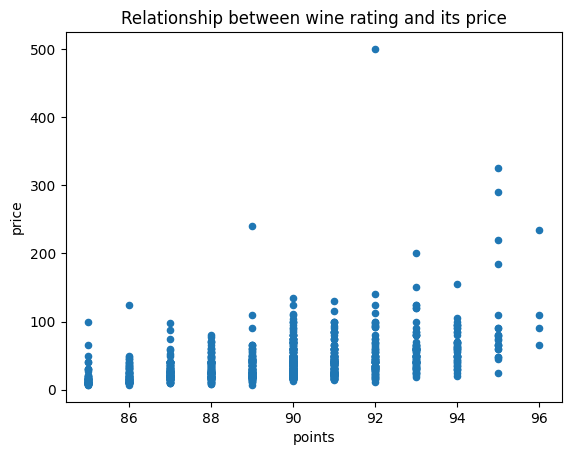

In [268]:
# use scater plot to visualise all values for price and points
wine_df.plot.scatter(x='points', y='price')
plt.title('Relationship between wine rating and its price')

_rom above results, it does not seem there is strong correlation between price and ranking. However, for wines with rating at 96, the price is slightly higher than rest of the rating. A good range of wines are under 100. You could also get very good quality wines with rating over 90 with little spend. Therefore, you do not need to spend lots of money to buy good quality wines._

### 5. Find out which are the top wine varieties in the dataset. Do they cost similar?

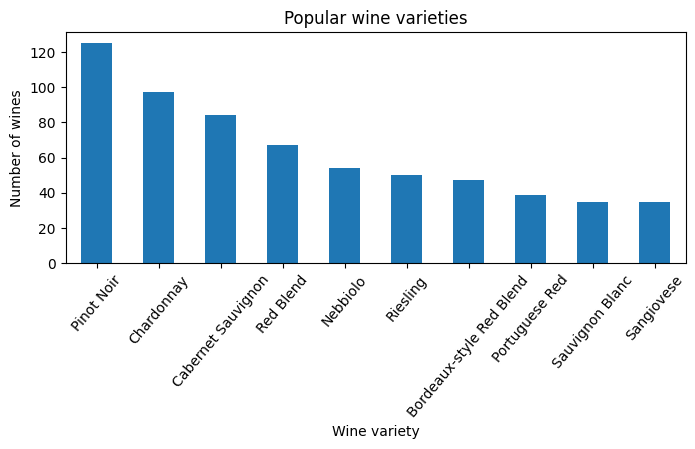

In [269]:
# use 'variety' column to rank the top wine varieties
variety = wine_df.groupby('variety')
plt.figure(figsize=(8,3))
variety.size().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=50)
plt.title('Popular wine varieties')
plt.xlabel("Wine variety")
plt.ylabel("Number of wines")
plt.show()

_From the result, the top 3 most popular wine varieties are named ‘Pinot Noir’, ‘Chardonnay’, and ‘Cabemet Sauvignon’, respectively._

 Create a multi-plot grid to present price for each variety with histogram.


In [270]:
# select rows of datafram from selected three variaty values
wine_variety = ['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon' ]
wine_df_variety = wine_df[wine_df.variety.isin(wine_variety)]
wine_df_variety.head()

,country,description,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,Heitz
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,95,65.0,Oregon,Pinot Noir,Bergstr√∂m
9,US,The producer sources from two blocks of the vi...,95,60.0,California,Pinot Noir,Blue Farm
11,US,"From 18-year-old vines, this supple well-balan...",95,48.0,Oregon,Pinot Noir,Patricia Green Cellars


<Figure size 640x480 with 0 Axes>

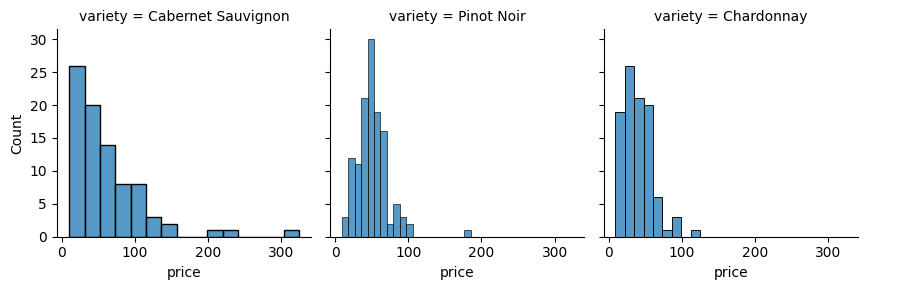

In [271]:
# creat a multi-plot grid
# show  histogram plot of the 'price' column for selecteded wine variaties
plt.figure()
g = sns.FacetGrid(wine_df_variety, col='variety', margin_titles=True)
g.map(sns.histplot, 'price')
g.add_legend()
plt.show()

_From the results, there are few wines for ‘Cabernet Sauvignon’ variety cost higher than 200. Prices for ‘Pinot Noir’ and ‘Chardonnay’ types are generally under 100, except very few being slightly over but still under 200 for all of the wines._

### 6.  Create word clouds of the flavours and name the most popular flavour.

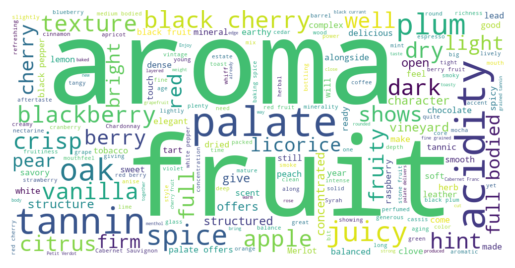

In [272]:
# create word clouds of 'description' of the wine
flavour_text = " ".join(review for review in wine_df.description)
stopwords = set(STOPWORDS)
stopwords.update(['show', 'ripe','nose','Drink','fresh', 'rich', 'notes', 'hin', 'offer', 'note', 'finish', 'blend', 'palate' 'Drink', 'now', 'wine', 'flavor', 'flavors'])
wordCloud1 = WordCloud(stopwords=stopwords, width = 1000, height = 500, margin = 5, background_color='white').generate(str(flavour_text))
plt.imshow(wordCloud1, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()


_It can be seen that the mostly popular flavours from descriptions of wines in the dataset are aroma, fruit, tannin, acidity, plum, spice, etc.._